<a href="https://colab.research.google.com/github/Andrie-wicaksono/Python-/blob/main/Tugas_Besar_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochammad Andrie Wicaksono

NIM: 1101184347

Kelas : TT-43-G10

Tugas Besar Pemrograman Python

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Parameter

In [117]:
tipe_area=['Urban','Suburban','Open']
fr = [700, 900, 1800]
hT = 80 #meter
hR = 1.5 #meter
d = np.arange(300, 1001, 5)
#print(d)
ptx = 30000 #mW
gtx = 10 #dB
grx = 2 #dB
BW = 5000000 #Hz

NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

ptx_dbm = NtL(ptx) #dalam dBm

In [118]:
def cos(fr,tipe,hT,hR,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='Urban' :
        Cm=0
    elif tipe=='Suburban' :
        Cm= -2*((np.log10((fr/28)**2))-5.4)
    elif tipe=='Open' :
        Cm= -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(fr)-0.7)*hR-(1.56*np.log10(fr)-1.8)
    Lp = Ca+(Cb*np.log10(fr))-(13.83*np.log(hT))-ahr+((44.9-6.55*np.log10(hT))*np.log10(d))-Cm
    
    return Lp

# Fungsi Daya Terima

In [119]:
def daya_terima(LP,ptx_dbm, gtx,grx):
  prx = ptx_dbm - LP + gtx + grx
  return prx

# Fungsi SNR

In [120]:
def snr_rumus(prx,BW):
  No = -174 + 10*np.log10(BW)
  No_num = LtN(No)
  SNR = prx/No_num
  return SNR

# Fungsi Kapasitas seluler

In [121]:
def caps_cell(d, SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW * np.log2(hasil_list)
  return kapasitas

# Pathloss 1

In [122]:
#Urban
def pl_Urban():
  f = fr[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,hT,hR,d)
    return Urban_1800
pathloss_Urban = pl_Urban()

#Suburban
def pl_Suburban():
  f = fr[2]
  tipe = tipe_area[1]
  for i in range(len(d)):
    Suburban_1800 = cos(f,tipe,hT,hR,d)
    return Suburban_1800
pathloss_Suburban = pl_Suburban()

#Open
def pl_Open():
  f = fr[2]
  tipe = tipe_area[2]
  for i in range(len(d)):
    Open_1800 = cos(f,tipe,hT,hR,d)
    return Open_1800
pathloss_Open = pl_Open()

# Daya Terima 1

In [123]:
#prx Urban
def prx_Urban():
  for i in range(len(pathloss_Urban)):
    x = daya_terima(pathloss_Urban,ptx_dbm,gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_Urban = prx_Urban()

#prx Suburban
def prx_Suburban():
  for i in range(len(pathloss_Suburban)):
    y = daya_terima(pathloss_Suburban,ptx_dbm,gtx,grx)
    y_num = LtN(y)
    return y_num
dayaterima_Suburban = prx_Suburban()

#prx Open
def prx_Open():
  for i in range(len(pathloss_Open)):
    z = daya_terima(pathloss_Open,ptx_dbm,gtx,grx)
    z_num = LtN(z)
    return z_num
dayaterima_Open = prx_Open()

# SNR 1

In [124]:
#snr Urban
def snr_Urban():
  for i in range(len(dayaterima_Urban)):
    snrU = snr_rumus(dayaterima_Urban,BW)
    return snrU
SNR_Urban = snr_Urban()


#snr Suburban
def snr_Suburban():
  for i in range(len(dayaterima_Suburban)):
    snrS = snr_rumus(dayaterima_Suburban,BW)
    return snrS
SNR_Suburban = snr_Suburban()


#snr Open
def snr_Open():
  for i in range(len(dayaterima_Open)):
    snrO = snr_rumus(dayaterima_Open,BW)
    return snrO
SNR_Open = snr_Open()


# Kapasitas Seluler 1

In [125]:
##Urban
def cc_urban():
  for i in range(len(SNR_Urban)):
    ccU = caps(d, SNR_Urban, BW)
  return ccU
CC_Urban = cc_urban()

#Suburban
def cc_suburban():
  for i in range(len(SNR_Suburban)):
    ccS = caps(d, SNR_Suburban, BW)
  return ccS
CC_Suburban = cc_suburban()

#Open
def cc_open():
  for i in range(len(SNR_Open)):
    ccO = caps(d, SNR_Open, BW)
  return ccO
CC_Open = cc_open()

# Pathloss 2

In [126]:
##700
def pl_700():
  f = fr[0]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_700 = cos(f,tipe,hT,hR,d)
    return Urban_700
pathloss_700 = pl_700()

#900
def pl_900():
  f = fr[1]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_900 = cos(f,tipe,hT,hR,d)
    return Urban_900
pathloss_900 = pl_900()

#1800
def pl_1800():
  f = fr[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,hT,hR,d)
    return Urban_1800
pathloss_1800 = pl_1800()

# Daya Terima 2

In [127]:
#prx 700
def prx_700():
  for i in range(len(pathloss_700)):
    a = daya_terima(pathloss_700,ptx_dbm,gtx,grx)
    a_num = LtN(a)
    return a_num
dayaterima_700 = prx_700()

#prx 900
def prx_900():
  for i in range(len(pathloss_900)):
    b = daya_terima(pathloss_900,ptx_dbm,gtx,grx)
    b_num = LtN(b)
    return b_num
dayaterima_900 = prx_900()

#prx 1800
def prx_1800():
  for i in range(len(pathloss_1800)):
    c = daya_terima(pathloss_1800,ptx_dbm,gtx,grx)
    c_num = LtN(c)
    return c_num
dayaterima_1800 = prx_1800()

# SNR 2

In [128]:
#snr 700
def snr_700():
  for i in range(len(dayaterima_700)):
    snr1 = snr_rumus(dayaterima_700,BW)
    return snr1
SNR_700 = snr_700()


#snr 900
def snr_900():
  for i in range(len(dayaterima_900)):
    snr2 = snr_rumus(dayaterima_900,BW)
    return snr2
SNR_900 = snr_900()


#snr 1800
def snr_1800():
  for i in range(len(dayaterima_1800)):
    snr3 = snr_rumus(dayaterima_1800,BW)
    return snr3
SNR_1800 = snr_1800()


# Kapasitas seluler 2

In [129]:
#700
def cc_700():
  for i in range(len(SNR_700)):
    cc1 = caps(d, SNR_700, BW)
    return cc1
CC_700 = cc_700()

#900
def cc_900():
  for i in range(len(SNR_900)):
    cc2 = caps(d, SNR_900, BW)
    return cc2
CC_900 = cc_900()

#1800
def cc_1800():
  for i in range(len(SNR_1800)):
    cc3 = caps(d, SNR_1800, BW)
    return cc3
CC_1800 = cc_1800()

# GRAFIK

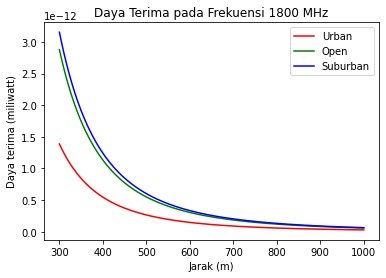

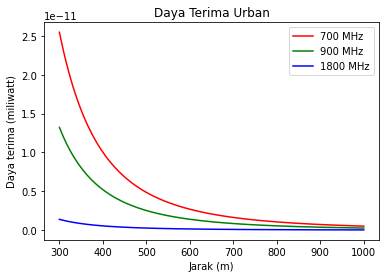

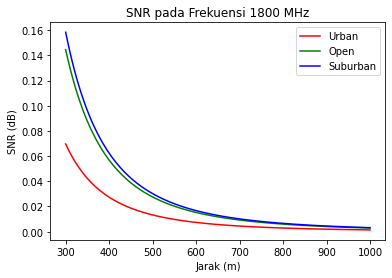

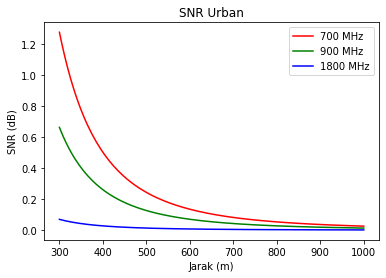

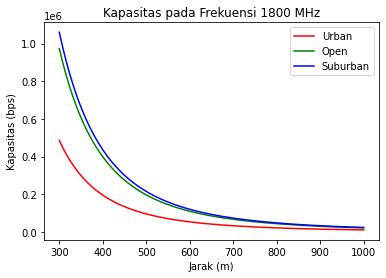

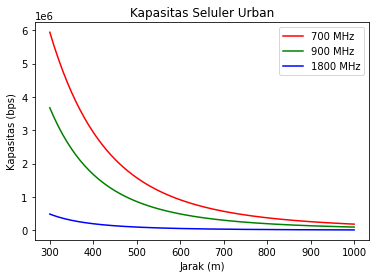

In [136]:
def graphprx_1():
  plt.figure()
  plt.plot(d, dayaterima_Urban,'r', label='Urban')
  plt.plot(d, dayaterima_Open,'g', label='Open')
  plt.plot(d, dayaterima_Suburban,'b', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()

 
def graphprx_2():
  plt.figure()
  plt.plot(d, dayaterima_700,'r', label='700 MHz')
  plt.plot(d, dayaterima_900,'g', label='900 MHz')
  plt.plot(d, dayaterima_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()

def graph_snr1():
  plt.figure()
  plt.plot(d,SNR_Urban,'r', label='Urban')
  plt.plot(d,SNR_Open,'g', label='Open')
  plt.plot(d,SNR_Suburban,'b', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def graph_snr2():
  plt.figure()
  plt.plot(d,SNR_700,'r', label='700 MHz')
  plt.plot(d,SNR_900,'g', label='900 MHz')
  plt.plot(d,SNR_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("SNR Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

def graph_cc1():
  plt.figure()
  plt.plot(d,CC_Urban,'r', label='Urban')
  plt.plot(d,CC_Open,'g', label='Open')
  plt.plot(d,CC_Suburban,'b', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def graph_cc2():
  plt.figure()
  plt.plot(d,CC_700,'r', label='700 MHz')
  plt.plot(d,CC_900,'g', label='900 MHz')
  plt.plot(d,CC_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas Seluler Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()


graphprx_1()
graphprx_2()
graph_snr1()
graph_snr2()
graph_cc1()
graph_cc2()
